In [1]:
#2

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')



LOADING DATASET

In [4]:
df=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Titanic/titanic_train.csv")

EDA

In [5]:
df.shape

(891, 12)

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# There are 4 categorical columns from 12 columns.
# There are null values in age,cabin and embarked.
# The target value is Survived which is categorical in nature. The two categories are 0 and 1 for passenger died or survived respectively.
#Passeneger Id is nominal in nature hence we will drop it
#Cabin has huge null values hence dropping it
# Only 38% travellers survived.
#We all see that most people have travelled alone as the mean of SibSp and Parch is less
#age range is 4 months to 80 years
#Name doesnt hold is also nominal in nature

Filling null values for age using mean

In [11]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
#Since only 2 rows are missing , we are dropping the rows

df.dropna(subset=['Embarked'],inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


In [15]:
df=df.drop(columns=['Cabin','PassengerId','Name'],axis=1)
df


,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.000000,1,0,A/5 21171,7.2500,S
1,1,1,female,38.000000,1,0,PC 17599,71.2833,C
2,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.000000,1,0,113803,53.1000,S
4,0,3,male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,211536,13.0000,S
887,1,1,female,19.000000,0,0,112053,30.0000,S
888,0,3,female,29.699118,1,2,W./C. 6607,23.4500,S
889,1,1,male,26.000000,0,0,111369,30.0000,C


In [16]:
df['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [17]:
#This further substantiates that only 340 passengers survived

DATA VISUALISATION

Finding correlation of different variable to target

In [19]:
corr=df.corr()

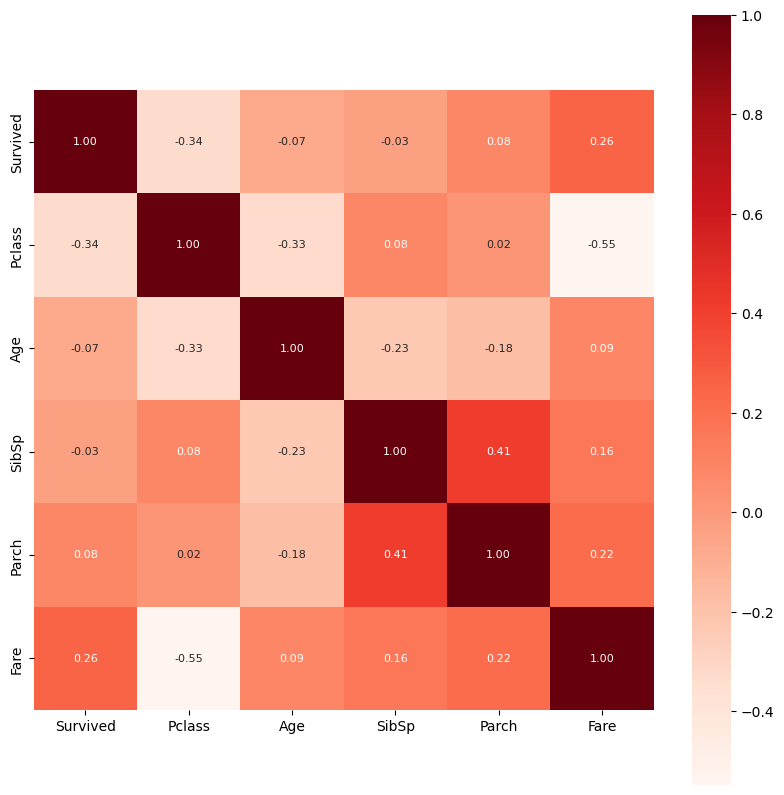

In [92]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,cbar=True,square=True,fmt=".2f",annot=True,annot_kws={"size":8},cmap="Reds")
plt.show()

In [21]:
#We see that survival and Pclass and Fare are negatively correlated, which means that lower the passengers' class lower is survival rate.
#This is further substantiated by Fare column. Lower fare means low class and low survival. hence negative correlation.

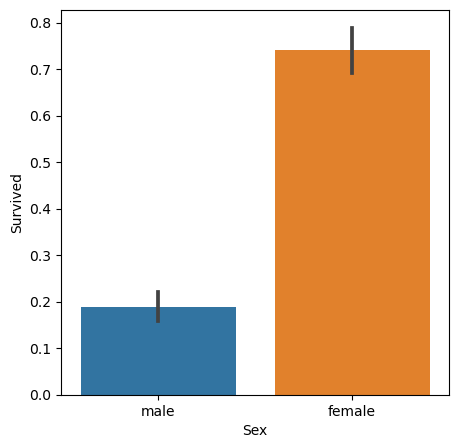

In [22]:
plot=plt.figure(figsize=(5,5))# to create graph
sns.barplot(x='Sex',y='Survived',data=df)
plt.show()

In [23]:
#We also see that Females have a better chances of Survival

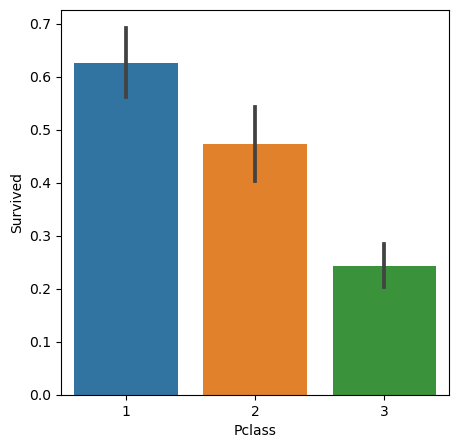

In [24]:
plot=plt.figure(figsize=(5,5))# to create graph
sns.barplot(x='Pclass',y='Survived',data=df)
plt.show()

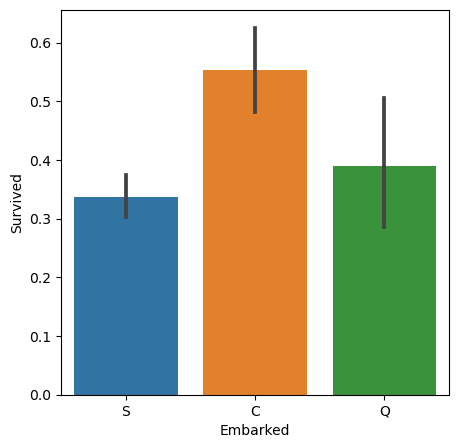

In [25]:
plot=plt.figure(figsize=(5,5))# to create graph
sns.barplot(x='Embarked',y='Survived',data=df)
plt.show()

In [26]:
#We also see that passengers who boarded the ship from Cherbourg have a better chances of Survival

In [27]:
#But we need to encode the Sex and Embarked column in to machine understandable language. This is encoding.
#I am using replace and if function

In [28]:
df.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,0,22.000000,1,0,A/5 21171,7.2500,0
1,1,1,1,38.000000,1,0,PC 17599,71.2833,1
2,1,3,1,26.000000,0,0,STON/O2. 3101282,7.9250,0
3,1,1,1,35.000000,1,0,113803,53.1000,0
4,0,3,0,35.000000,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,211536,13.0000,0
887,1,1,1,19.000000,0,0,112053,30.0000,0
888,0,3,1,29.699118,1,2,W./C. 6607,23.4500,0
889,1,1,0,26.000000,0,0,111369,30.0000,1


Data splitting

In [30]:
#We see that ticket doesnt impact the survival . Hence we drop that and keep the other features into X
#We further split dataset by keeping target variable to y

In [32]:
X=df.drop(columns=['Ticket','Survived'],axis=1)
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.000000,1,0,7.2500,0
1,1,1,38.000000,1,0,71.2833,1
2,3,1,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,0
4,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,0
887,1,1,19.000000,0,0,30.0000,0
888,3,1,29.699118,1,2,23.4500,0
889,1,0,26.000000,0,0,30.0000,1


In [34]:
y=df['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

Applying Standard Scaling to get optimized result

In [36]:

sc=StandardScaler()
x=pd.DataFrame(sc.fit_transform(X),columns=X.columns)
x


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.825209,-0.735342,-0.590495,0.431350,-0.474326,-0.500240,-0.569684
1,-1.572211,1.359911,0.643971,0.431350,-0.474326,0.788947,1.003139
2,0.825209,1.359911,-0.281878,-0.475199,-0.474326,-0.486650,-0.569684
3,-1.572211,1.359911,0.412509,0.431350,-0.474326,0.422861,-0.569684
4,0.825209,-0.735342,0.412509,-0.475199,-0.474326,-0.484133,-0.569684
...,...,...,...,...,...,...,...
884,-0.373501,-0.735342,-0.204724,-0.475199,-0.474326,-0.384475,-0.569684
885,-1.572211,1.359911,-0.821957,-0.475199,-0.474326,-0.042213,-0.569684
886,0.825209,1.359911,0.003524,0.431350,2.006119,-0.174084,-0.569684
887,-1.572211,-0.735342,-0.281878,-0.475199,-0.474326,-0.042213,1.003139


In [40]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=40)

print(X.shape,X_train.shape,X_test.shape)

(889, 7) (711, 7) (178, 7)


MODEL TRAINING AND EVALUATION OF EACH MODEL

In [57]:
#Since the target is a binary classification, Logistic regression works the best. Hence we first start with it and see whether any other model is better
log_model=LogisticRegression()
log_model.fit(X_train,y_train)
y_pred=log_model.predict(X_train)
log_model_train_result=['LogisticRegression',accuracy_score(y_train,y_pred)]
log_model_train_result


['LogisticRegression', 0.8030942334739803]

In [58]:
y_pred=log_model.predict(X_test)
log_model_result=['LogisticRegression',accuracy_score(y_test,y_pred)]
log_model_result

['LogisticRegression', 0.7808988764044944]

In [55]:
#Since the accuracy of train and test data is negligible, we understand that the data is neither underfitted or overfitted.

In [59]:
Knn_model=KNeighborsClassifier(n_neighbors=3)
Knn_model.fit(X_train,y_train)
y_pred=Knn_model.predict(X_test)
Knn_model_result=['KNeighborsClassifier',accuracy_score(y_test,y_pred)]
Knn_model_result

['KNeighborsClassifier', 0.6629213483146067]

In [60]:
SVC_model=SVC()
SVC_model.fit(X_train,y_train)
y_pred=SVC_model.predict(X_test)
SVC_model_result=['Support Vector',accuracy_score(y_test,y_pred)]
SVC_model_result

['Support Vector', 0.6910112359550562]

In [54]:
#here looking at result we can go ahead with LOGISTIC REGRESSION as it is having a good accuracy

MODEL PREDICTION

In [70]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [78]:
data={'Pclass':1,'Sex':1,'Age':51.00,'SibSp':0,'Parch':0,'Fare':26.5500,'Embarked':1}
index=[0]
df1=pd.DataFrame(data,index)
df1


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,51.0,0,0,26.55,1


In [79]:
pred_random=log_model.predict(df1)
pred_random

array([1], dtype=int64)

In [80]:
#This shows that model predicts that a 51 year old lady passenger from Cherbourg, who is travelling in the first class and is  alone , will survive the accident.

In [81]:
#THANK YOU